In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 82% 51.0M/62.3M [00:00<00:00, 190MB/s]
100% 62.3M/62.3M [00:00<00:00, 184MB/s]


In [ ]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r'/content/dataset/Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'/content/dataset/Testing',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [ ]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


In [ ]:
#2.initializing the model
model=Sequential()

In [ ]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [ ]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#add flatten layer
model.add(Flatten())

In [ ]:
#and hidden layer
model.add(Dense(units=128,activation="relu"))

In [ ]:
#add output layer
model.add(Dense(units=4,activation="softmax"))

In [ ]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [ ]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)

Epoch 1/5
39/39 [==============================] - 12s 277ms/step - loss: 2.2235 - accuracy: 0.2706 - val_loss: 1.3268 - val_accuracy: 0.3625
Epoch 2/5
39/39 [==============================] - 10s 244ms/step - loss: 1.2677 - accuracy: 0.4015 - val_loss: 1.2039 - val_accuracy: 0.4500
Epoch 3/5
39/39 [==============================] - 10s 257ms/step - loss: 1.1582 - accuracy: 0.4943 - val_loss: 1.0374 - val_accuracy: 0.5625
Epoch 4/5
39/39 [==============================] - 10s 259ms/step - loss: 1.0414 - accuracy: 0.5420 - val_loss: 0.9283 - val_accuracy: 0.5562
Epoch 5/5
39/39 [==============================] - 9s 224ms/step - loss: 0.9690 - accuracy: 0.5775 - val_loss: 0.7928 - val_accuracy: 0.7125


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.save("animal.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

In [ ]:
model=tf.keras.models.load_model(r"animal.h5",compile=False)

In [ ]:
img=image.load_img(r"elephant_test.jpg",target_size=(64,64))

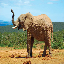

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[149., 203., 237.],
        [152., 205., 240.],
        [154., 209., 238.],
        ...,
        [137., 207., 240.],
        [134., 213., 248.],
        [132., 210., 245.]],

       [[162., 210., 239.],
        [164., 212., 239.],
        [166., 214., 241.],
        ...,
        [148., 203., 239.],
        [141., 207., 239.],
        [135., 211., 245.]],

       [[145., 206., 237.],
        [156., 207., 240.],
        [163., 214., 240.],
        ...,
        [141., 207., 239.],
        [141., 207., 239.],
        [134., 213., 246.]],

       ...,

       [[219., 174., 103.],
        [201., 150.,  69.],
        [209., 158.,  77.],
        ...,
        [200., 158.,  81.],
        [192., 151.,  76.],
        [201., 156.,  82.]],

       [[215., 169.,  89.],
        [226., 180., 112.],
        [212., 168.,  90.],
        ...,
        [182., 139.,  81.],
        [182., 136.,  79.],
        [176., 132.,  81.]],

       [[228., 188., 108.],
        [190., 152.,  67.],
        [208., 1

In [ ]:
x=np.expand_dims(x,axis=0)
x.ndim


4

In [ ]:
pred=model.predict(x)

1/1 [==============================] - 0s 64ms/step


In [ ]:
pred_class=np.argmax(pred,axis=1)

In [ ]:
index=['bears', 'crows', 'elephants', 'rats']
result=str(index[pred_class[0]])
result

'elephants'